## 데이터에서 새로운 인사이트 찾기

### 새로운 컬럼 추가하기

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('data/lec12_discoverNewInsight/broadcast.csv', index_col=0)
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215


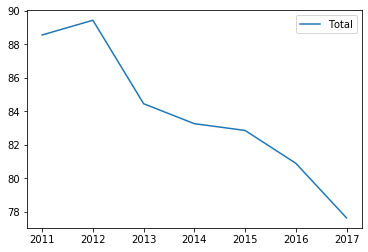

In [3]:
df['Total'] = df.sum(axis='columns')  
# df['Total'] = df['KBS'] + df['MBC'] + df['SBS'] + df['TV CHOSUN'] + df['JTBC'] + df['Channel A'] + df['MBN']
df.plot(y='Total')

In [4]:
#지상파, 공중파를 따로 뽑아내기
df['Group 1'] = df.loc[:,:'SBS'].sum(axis='columns')
df['Group 2'] = df.loc[:,'TV CHOSUN':'MBN'].sum(axis='columns')
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN,Total,Group 1,Group 2
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809,88.560,65.498,23.062
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310,89.440,63.593,25.847
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825,84.451,58.440,26.011
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572,83.259,55.981,27.278
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520,82.854,53.449,29.405
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477,80.891,51.234,29.657
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215,77.626,48.016,29.610


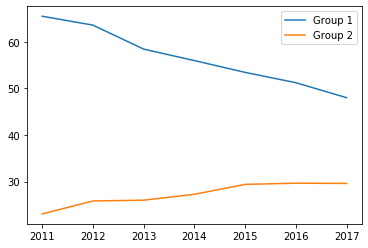

In [5]:
df.plot(y=['Group 1', 'Group 2'])

---
## 문자열 필터링

In [6]:
import pandas as pd
df = pd.read_csv('data/lec12_discoverNewInsight/albums.csv', encoding='latin1')
df.head()

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


In [7]:
df['Genre'].unique()

array(['Rock', 'Rock, Pop', 'Funk / Soul', 'Rock, Blues', 'Jazz',
       'Jazz, Rock, Blues, Folk, World, & Country', 'Funk / Soul, Pop',
       'Blues', 'Pop', 'Rock, Folk, World, & Country',
       'Folk, World, & Country', 'Classical, Stage & Screen', 'Reggae',
       'Hip Hop', 'Jazz, Funk / Soul', 'Rock, Funk / Soul, Pop',
       'Electronic, Rock',
       'Jazz, Rock, Funk / Soul, Folk, World, & Country',
       'Jazz, Rock, Funk / Soul, Pop, Folk, World, & Country',
       'Funk / Soul, Stage & Screen',
       'Electronic, Rock, Funk / Soul, Stage & Screen',
       'Rock, Funk / Soul', 'Rock, Reggae', 'Jazz, Pop',
       'Funk / Soul, Folk, World, & Country', 'Latin, Funk / Soul',
       'Funk / Soul, Blues',
       'Reggae,ï¿½Pop,ï¿½Folk, World, & Country,ï¿½Stage & Screen',
       'Electronic,ï¿½Stage & Screen', 'Jazz, Rock, Funk / Soul, Blues',
       'Jazz, Rock', 'Rock, Latin, Funk / Soul', 'Electronic, Rock, Pop',
       'Hip Hop, Rock, Funk / Soul', 'Electronic, Pop',
   

In [8]:
# Blues를 포함한 데이터를 뽑아올때
df['Genre'].str.contains('Blues')
df[df['Genre'].str.contains('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
14,15,1967,Are You Experienced,The Jimi Hendrix Experience,"Rock, Blues","Blues Rock, Psychedelic Rock"
18,19,1968,Astral Weeks,Van Morrison,"Jazz, Rock, Blues, Folk, World, & Country","Acoustic, Classic Rock, Free Improvisation"
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
48,49,1971,At Fillmore East,The Allman Brothers Band,"Rock, Blues",Blues Rock
49,50,1957,Here's Little Richard,Little Richard,"Rock, Blues","Rock & Roll, Rhythm & Blues"
54,55,1968,Electric Ladyland,The Jimi Hendrix Experience,"Rock, Blues","Electric Blues, Psychedelic Rock"
59,60,1969,Trout Mask Replica,Captain Beefheart & His Magic Band,"Rock, Blues","Dialogue, Field Recording, Avantgarde, Electri..."
101,102,1966,Fresh Cream,Cream,"Rock, Blues","Blues Rock, Electric Blues"
118,119,1960,At Last!,Etta James,"Funk / Soul, Blues","Rhythm & Blues, Soul"


In [9]:
# Blues가 앞에 있는 것만 포함할때
df['Genre'].str.startswith('Blues')
df[df['Genre'].str.startswith('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,None
277,278,1997,Anthology of American Folk Music,Various,"Blues, Folk, World, & Country","Cajun, Country, Field Recording, Gospel, Delta..."
281,282,1964,Folk Singer,Muddy Waters,Blues,Delta Blues
376,377,1991,The Ultimate Collection: 1948-1990,John Lee Hooker,Blues,"Country Blues, Electric Blues, Chicago Blues, ..."
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [10]:
# Blues를 포함하는 앨범을 표시하기
df['Contains Blues'] = df['Genre'].str.contains('Blues')
df

,Number,Year,Album,Artist,Genre,Subgenre,Contains Blues
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",False
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",False
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",False
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",False
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,False
...,...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock,False
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara...",False
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock,False
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues,True


--- 
## 문자열 분리


In [11]:
import pandas as pd
df = pd.read_csv('data/lec12_discoverNewInsight/parks.csv')
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,전화번호
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438


In [12]:
df['소재지도로명주소'].str.split() # 기본 띄어쓰기 기반  -를 자르려면 pat='-' 기술해주기
df['소재지도로명주소'].str.split(n=1) #n을 써주면 처음 스페이스 까지만 자른다는 의미
df['소재지도로명주소'].str.split(n=1, expand=True) # expand를 통해 독립적인 테이블로 제작

,0,1
0,광주광역시,북구 대천로 86
1,광주광역시,북구 삼정로 36
2,광주광역시,북구 임방울대로 877
3,광주광역시,북구 일곡로 55
4,광주광역시,북구 설죽로 526
...,...,...
8117,충청남도,홍성군 홍성읍 오관리 472 일원
8118,경상북도,영양군 영양읍 군민회관길 42-6
8119,경상북도,영양군 입암면 신구리 산27-5번지
8120,경상북도,영양군 수비면 발리리 산48번지


In [13]:
address = df['소재지도로명주소'].str.split(n=1, expand=True)
df['관할구역'] = address[0]
df

,관리번호,공원명,공원구분,소재지도로명주소,전화번호,관할구역
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438,광주광역시
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438,광주광역시
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438,광주광역시
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438,광주광역시
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438,광주광역시
...,...,...,...,...,...,...
8117,44800-00082,홍성읍24호소공원,소공원,충청남도 홍성군 홍성읍 오관리 472 일원,041-630-1268,충청남도
8118,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 군민회관길 42-6,054-680-6340,경상북도
8119,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5번지,054-680-6340,경상북도
8120,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48번지,054-680-6340,경상북도


---
## 카테고리로 분류

In [14]:
%matplotlib inline
import pandas as pd

In [15]:
df = pd.read_csv('data/lec12_discoverNewInsight/laptops.csv')

In [16]:
brand_nation = {
    'Dell': 'U.S.',
    'Apple': 'U.S.',
    'HP': 'U.S.',
    'Alienware': 'U.S.',
    'Microsoft': 'U.S.',
    'Acer': 'Taiwan',
    'Asus': 'Taiwan',
    'Lenovo': 'China'
}

In [17]:
df['brand'].map(brand_nation) # -> 브랜드에 있는 값들을 brand_nation 키값으로 검색해서 value값들을 찾아주는 함수
df['brand_nation'] = df['brand'].map(brand_nation)
df

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments,brand_nation
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN,U.S.
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN,Taiwan
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN,Taiwan
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN,Taiwan
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN,Taiwan


---
## GroupBy
#### 카테고리화 편하게 사용하기

In [18]:
df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments,brand_nation
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN,U.S.
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.


In [36]:
nation_groups = df.groupby('brand_nation')
nation_groups

In [20]:
nation_groups.count() # brand_nation에 속하는 속성이 전체 컬럼에 몇개의 값이 있는지 분석

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18
Taiwan,44,44,44,44,44,44,44,44,44,44,43,14,44,42,9
U.S.,105,105,105,105,105,105,105,105,105,104,102,50,105,100,28


In [22]:
nation_groups.mean()

,ram,hd_size,screen_size,price,clock_speed,graphic_card_size,weight
brand_nation,,,,,,,
China,6.000000,1080.888889,15.300000,47347.777778,2.500000,2.352941,2.461111
Taiwan,6.272727,726.363636,14.970455,53320.409091,2.164545,288.285714,2.242381
U.S.,7.314286,733.257143,14.603429,71541.295238,2.356346,2.980000,2.216500


In [31]:
# nation_groups.max() 

In [32]:
nation_groups.first()
nation_groups.last()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,Lenovo,IdeaPad 520-15IKB 80YL00RXIN,8,hdd,1024,15.6,69990,intel,i7,3.5,nvidia,4.0,windows,2.2,"Core i7-7500U 7th Gen processor, Dolby Audio"
Taiwan,Asus,X540LA-XX538T,4,hdd,1024,15.6,30899,intel,i3 5th gen,2.0,intel,1.0,windows,2.3,Integrated Graphics
U.S.,Microsoft,Surface Book CR9-00013,8,ssd,128,13.5,178799,intel,i5,1.8,intel,2.0,windows,1.5,Integrated Graphics


brand_nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

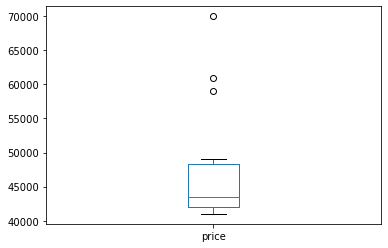

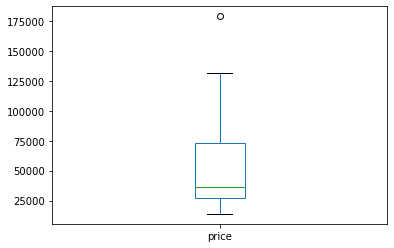

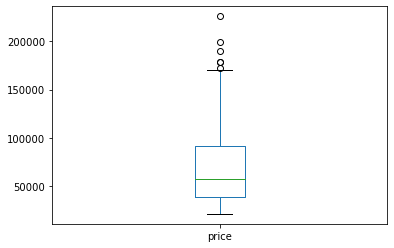

In [34]:
nation_groups.plot(kind='box', y='price')

brand_nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

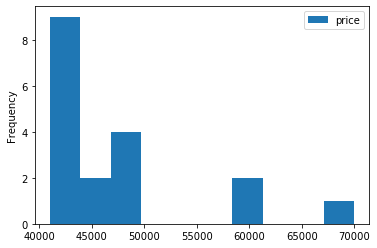

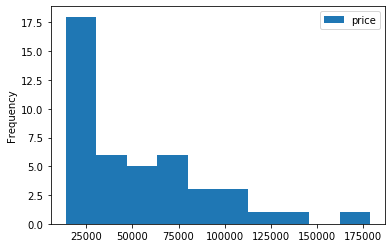

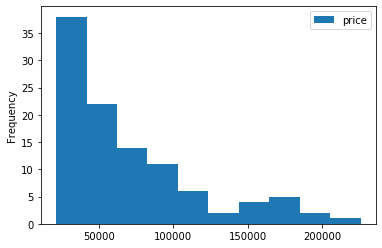

In [35]:
nation_groups.plot(kind='hist', y='price')

---
## 데이터 합치기

#### 4가지 merge 방법

1. inner join         
![inner join](data/lec12_discoverNewInsight/innerJoin.png)
2. left outer join    
![left outer join](data/lec12_discoverNewInsight/leftOuterJoin.png)
3. right outer join   
![right outer join](data/lec12_discoverNewInsight/rightOuterJoin.png)
4. full outer join    
![full outer join](data/lec12_discoverNewInsight/fullOuterJoin.png)

In [37]:
import pandas as pd

In [40]:
price_df = pd.read_csv('data/lec12_discoverNewInsight/vegetable_price.csv')
price_df

,Product,Price
0,Potato,3000
1,Onion,1600
2,Avocado,5000
3,Garlic,1200
4,Tomato,3500
5,Lettuce,2000
6,Carrot,2500


In [39]:
quantity_df = pd.read_csv('data/lec12_discoverNewInsight/vegetable_quantity.csv')
quantity_df

,Product,Quantity
0,Potato,25
1,Onion,31
2,Avocado,57
3,Pepper,46
4,Broccoli,25
5,Cucumber,9


In [43]:
pd.merge(price_df, quantity_df, on='Product') # 기본값 inner join

,Product,Price,Quantity
0,Potato,3000,25
1,Onion,1600,31
2,Avocado,5000,57


In [46]:
pd.merge(price_df, quantity_df, on='Product', how='left')  # left join
pd.merge(price_df, quantity_df, on='Product', how='right') # right join
pd.merge(price_df, quantity_df, on='Product', how='outer') # full join

,Product,Price,Quantity
0,Potato,3000.0,25.0
1,Onion,1600.0,31.0
2,Avocado,5000.0,57.0
3,Garlic,1200.0,NaN
4,Tomato,3500.0,NaN
5,Lettuce,2000.0,NaN
6,Carrot,2500.0,NaN
7,Pepper,NaN,46.0
8,Broccoli,NaN,25.0
9,Cucumber,NaN,9.0
